# **Praticle 8 : Implementation of K-means Clustering**

## *Clustering with two feature*


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [76]:
# Load Data
dfa = pd.read_csv('mall_data.csv')
dfa = dfa[['Annual Income (k$)', 'Spending Score (1-100)']]


In [77]:
# Check column names and data
print(dfa.head())


   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [78]:
# Feature Scaling
sc_dfa = StandardScaler()
dfa_std = sc_dfa.fit_transform(dfa.astype(float))


In [79]:
# Clustering with KMeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(dfa_std)
labels = kmeans.labels_

new_dfa = pd.DataFrame(data=dfa_std, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
new_dfa['label_kmeans'] = labels


/home/geek/.pyenv/versions/3.9.10/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


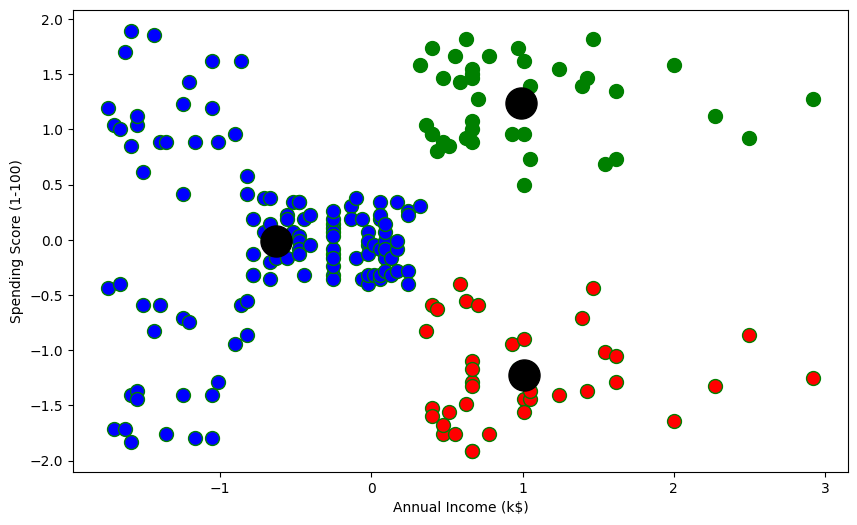

In [80]:
# Scatter plot
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i in range(len(colors)):
    plt.scatter(new_dfa["Annual Income (k$)"][new_dfa.label_kmeans == i],
                new_dfa["Spending Score (1-100)"][new_dfa.label_kmeans == i],
                c=colors[i], s=100, edgecolor='green', linestyle='-')
# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500)
# Set labels for axes
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

plt.show()

## *Clustering with three feature*


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



In [82]:
# Load Data
dfa = pd.read_csv('mall_data.csv')
dfa = dfa[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]




In [83]:
# Check column names and data
print(dfa.head())



   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40


In [84]:
# Feature Scaling
sc_dfa = StandardScaler()
dfa_std = sc_dfa.fit_transform(dfa.astype(float))



In [85]:
# Clustering with KMeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(dfa_std)
labels = kmeans.labels_

new_dfa = pd.DataFrame(data=dfa_std, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
new_dfa['label_kmeans'] = labels



/home/geek/.pyenv/versions/3.9.10/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


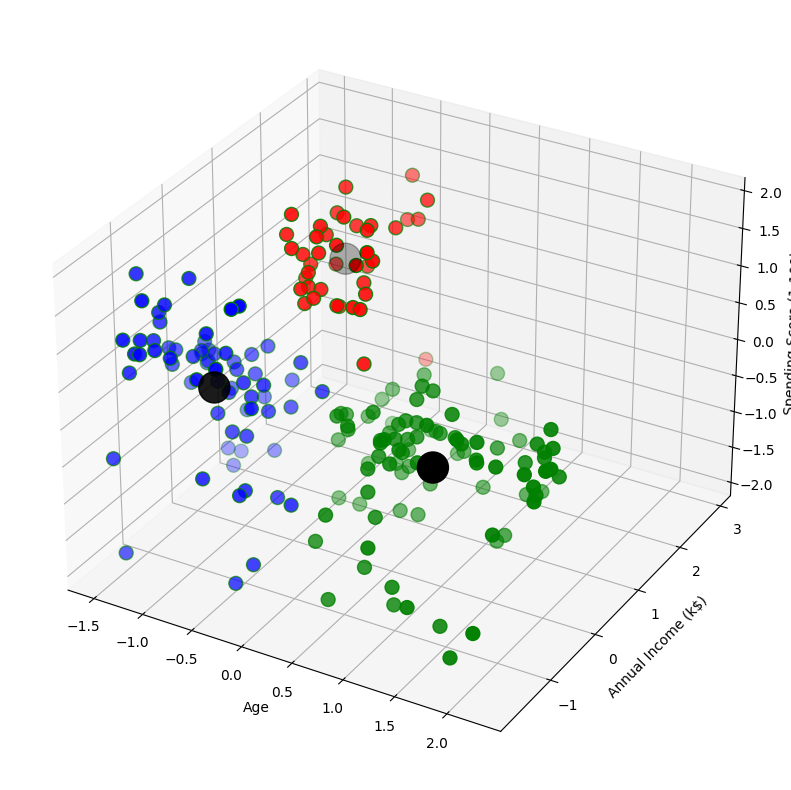

In [86]:

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot for each cluster
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i in range(len(colors)):
    ax.scatter(new_dfa.Age[new_dfa.label_kmeans == i],
               new_dfa["Annual Income (k$)"][new_dfa.label_kmeans == i],
               new_dfa["Spending Score (1-100)"][new_dfa.label_kmeans == i],
               c=colors[i], s=100, edgecolor='green', linestyle='-')

    
# Plot cluster centers
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=500)

# Set labels for axes
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')

plt.show()
